In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spectral_embedding as se

In [2]:
np.random.seed(42)

Generate a weighted two-community stochastic block model with the communities corresponding to anomalous nodes ($\mathbf{Z}_i = 1$) and normal nodes ($\mathbf{Z}_i = 2$). Edge weights are drawn from a one-inflated beta distribution,
$$
    \mathbf{A}_{ij} \mid \mathbf{Z}_i, \mathbf{Z}_j  \stackrel{\mathrm{ind}}{\sim} 
    (1 - \rho) \delta_1  + \rho \, \textrm{Beta}(\alpha_{\mathbf{Z}_i \mathbf{Z}_j}, 1).
$$
The beta distribution is used as a model for p-values. When both nodes are anomalous ($\mathbf{Z}_i = \mathbf{Z}_j = 1$), $\alpha_{\mathbf{Z}_i \mathbf{Z}_j} < 1$ producing a beta distribution that is stochastical dominated by the uniform distribution; p-values are more likely to be smaller than those from the uniform distribution. Otherwise $\alpha_{\mathbf{Z}_i \mathbf{Z}_j} = 1$ corresponding to the uniform distribution.

$\pi$ denotes the proability that a node is anomalous, $\rho$ denotes the one-inflation parameter, the chance that a p-value is computed for that edge.

In [3]:
K = 2      # Number of communities
n = 1000   # Number of nodes
p = 0.10   # Probability node is anomalous
a = 0.10   # Strength of p-value signal
rho = 0.25 # Zero-inflation parameter
tau = 0.10 # Threshold

In [4]:
pi = np.array([p, 1-p])

alpha = np.array([[a, 1],[1, 1]])
beta  = np.array([[1, 1],[1, 1]])

Generate $\mathbf{A}^\textrm{L}$  matrix as zero-inflated exponential SBM and generate the other matrices from that.

In [5]:
A_L, Z = se.generate_WSBM_zero(n, pi, [alpha], 'exponential', rho)
A_P = np.exp(-A_L)
A_B = 1 - A_P
A_T = np.heaviside(tau - A_P, 0)

Colour the nodes based on the community labels.

In [6]:
colours = np.array(['tab:red', 'tab:blue'])
Z_colours = colours[Z]

In [7]:
fig = plt.figure()
handles = [plt.scatter([],[], color='tab:red', marker='^', s=16, label=r'Anomalous, $\mathbf{Z}_i = 1$'),
           plt.scatter([],[], color='tab:blue', marker='s', s=16, label=r'Normal, $\mathbf{Z}_i = 2$')]
plt.close()

Embed the network into $d = 2$ dimensions corresponding to the two different communities.

In [8]:
XA_B = se.ASE(A_B, K)
XA_L = se.ASE(A_L, K)
XA_T = se.ASE(A_T, K)

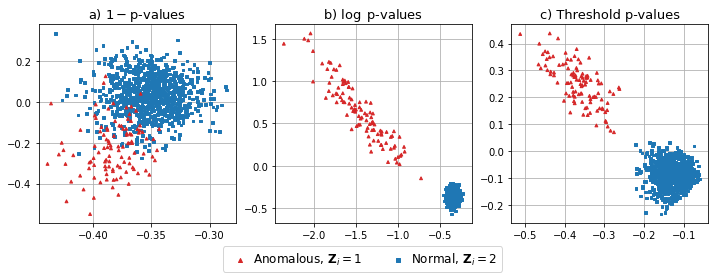

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12.0,4.0))

axs[0].grid(); axs[0].set_axisbelow(True)
axs[1].grid(); axs[1].set_axisbelow(True)
axs[2].grid(); axs[2].set_axisbelow(True)

idx = np.where(Z == 1)[0]
axs[0].scatter(XA_B[idx,0], XA_B[idx,1], marker='s', s=7, c=Z_colours[idx])
axs[1].scatter(XA_L[idx,0], XA_L[idx,1], marker='s', s=7, c=Z_colours[idx])
axs[2].scatter(XA_T[idx,0], XA_T[idx,1], marker='s', s=7, c=Z_colours[idx])

idx = np.where(Z == 0)[0]
axs[0].scatter(XA_B[idx,0], XA_B[idx,1], marker='^', s=8, c=Z_colours[idx])
axs[1].scatter(XA_L[idx,0], XA_L[idx,1], marker='^', s=8, c=Z_colours[idx])
axs[2].scatter(XA_T[idx,0], XA_T[idx,1], marker='^', s=8, c=Z_colours[idx])

axs[0].set_title('a) $1-$p-values', fontsize=13)
axs[1].set_title('b) $\log$ p-values', fontsize=13)
axs[2].set_title('c) Threshold p-values', fontsize=13);

fig.legend(handles=handles, bbox_to_anchor=(0.5,0), loc='lower center', ncol=2, fancybox=True, fontsize=12, handletextpad=0.1)
plt.subplots_adjust(bottom = 0.19);

Compute block mean and variance matrices for each edge weight representation in order to calculate the asymptotic distribution of the embeddings for both communities.

In [10]:
B_B = rho * beta / (alpha + beta)
C_B = rho * beta * (beta + 1) / ((alpha + beta) * (alpha + beta + 1)) - B_B**2

B_L = rho / alpha
C_L = 2 * rho / alpha**2 - B_L**2

B_T = rho * tau**alpha
C_T = B_T * (1 - B_T)

In [11]:
X_B, SigmaX_B = se.WSBM_distbn(A_B, B_B, C_B, Z, pi, K)
X_L, SigmaX_L = se.WSBM_distbn(A_L, B_L, C_L, Z, pi, K)
X_T, SigmaX_T = se.WSBM_distbn(A_T, B_T, C_T, Z, pi, K)

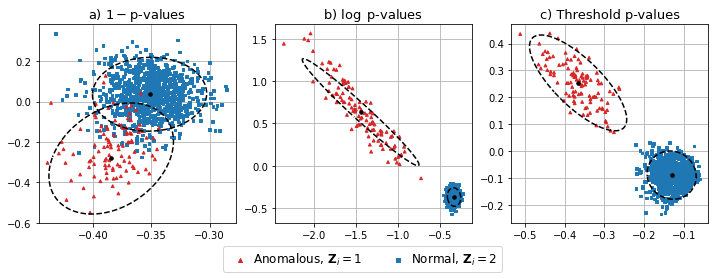

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12.0,4.0))

axs[0].grid(); axs[0].set_axisbelow(True)
axs[1].grid(); axs[1].set_axisbelow(True)
axs[2].grid(); axs[2].set_axisbelow(True)

idx = np.where(Z == 1)[0]
axs[0].scatter(XA_B[idx,0], XA_B[idx,1], marker='s', s=7, c=Z_colours[idx])
axs[1].scatter(XA_L[idx,0], XA_L[idx,1], marker='s', s=7, c=Z_colours[idx])
axs[2].scatter(XA_T[idx,0], XA_T[idx,1], marker='s', s=7, c=Z_colours[idx])

idx = np.where(Z == 0)[0]
axs[0].scatter(XA_B[idx,0], XA_B[idx,1], marker='^', s=8, c=Z_colours[idx])
axs[1].scatter(XA_L[idx,0], XA_L[idx,1], marker='^', s=8, c=Z_colours[idx])
axs[2].scatter(XA_T[idx,0], XA_T[idx,1], marker='^', s=8, c=Z_colours[idx])

axs[0].scatter(X_B[:,0], X_B[:,1], marker='o', s=12, c='black')
axs[1].scatter(X_L[:,0], X_L[:,1], marker='o', s=12, c='black')
axs[2].scatter(X_T[:,0], X_T[:,1], marker='o', s=12, c='black')

for i in range(K):
    ellipse = se.gaussian_ellipse(X_B[i], SigmaX_B[i][0:2,0:2]/n)
    axs[0].plot(ellipse[0], ellipse[1],'--', color='black')
    ellipse = se.gaussian_ellipse(X_L[i], SigmaX_L[i][0:2,0:2]/n)
    axs[1].plot(ellipse[0], ellipse[1],'--', color='black')
    ellipse = se.gaussian_ellipse(X_T[i], SigmaX_T[i][0:2,0:2]/n)
    axs[2].plot(ellipse[0], ellipse[1],'--', color='black')

axs[0].set_title('a) $1-$p-values', fontsize=13)
axs[1].set_title('b) $\log$ p-values', fontsize=13)
axs[2].set_title('c) Threshold p-values', fontsize=13);

fig.legend(handles=handles, bbox_to_anchor=(0.5,0), loc='lower center', ncol=2, fancybox=True, fontsize=12, handletextpad=0.1)
plt.subplots_adjust(bottom = 0.19);